In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [3]:
from sklearn.datasets import make_circles

In [31]:
X,Y= make_circles(100, factor=.1, noise=.08)

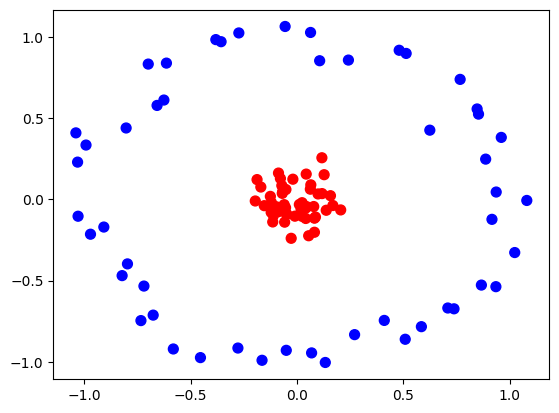

In [33]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='bwr')

In [34]:
X_train, Xtest, Y_train, Ytest = train_test_split(X,Y, random_state=0, test_size=.22)



```
Alternative methods:
Y_train.flatten() - Same kaam karta hai
Y_train.reshape(-1) - Also same result deta hai
Minglish tip:
ravel() = flat kar do ya 1D banado matlab!
```



In [35]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, Y_train.ravel())
Y_pred=classifier.predict(Xtest)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest, Y_pred)

0.4090909090909091

In [42]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, Y, clf):
    X_set, y_set = X, Y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

/tmp/ipython-input-3857646457.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


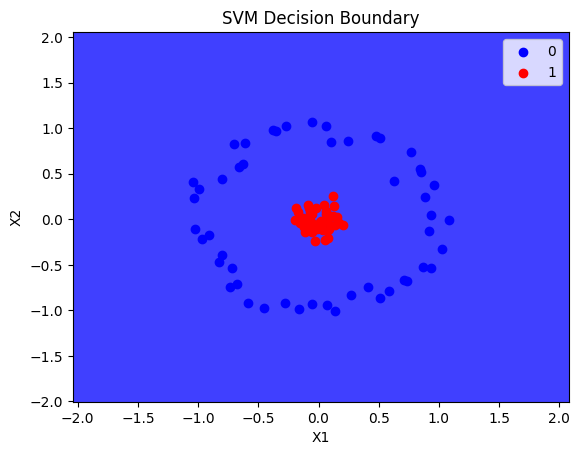

In [43]:

plot_decision_boundary(X, Y, classifier)